#  Case study

During the COVID-19 pandemic in 2020, the total sales increase in e-commerce increased by 37% in **India**. Due to increasingly fierce competition between competitors, you and your Product Manager are in discussion regarding how to stay afloat and compete in the e-commerce industry. After that, you decide to make an innovation or offer so that users will still choose you as their online shopping media.

For that, you are assigned to perform transaction-related analysis of user data. However, the problem is that the company is doing efficiency in terms of managing promotional funds in 2021. As a data analyst, what insights and recommendations can you give to the company?

**Objectives:** 
* user acqusition & user retention through new program or offer
    1. how new user use and get to know ecom
    2. how to keep new user and old user stay

**Approach:**
* Data deep dive to know our customer more and then we go from there

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
path = "/content/data.csv"

In [ ]:
df = pd.read_csv(path,header= 0,encoding="ISO-8859-1", dtype = {'CustomerID': str,'InvoiceID': str})

In [ ]:
df_clean = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# **Cleaning**

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
338919,566571,23390,DOLLY GIRL MINI BACKPACK,4.0,9/13/2011 12:49,4.15,17037,United Kingdom
338920,566571,22949,36 DOILIES DOLLY GIRL,12.0,9/13/2011 12:49,1.45,17037,United Kingdom
338921,566571,22138,BAKING SET 9 PIECE RETROSPOT,3.0,9/13/2011 12:49,4.95,17037,United Kingdom
338922,566571,23203,JUMBO BAG VINTAGE DOILY,10.0,9/13/2011 12:49,2.08,17037,United Kingdom
338923,566571,21931,J,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [ ]:
df_clean.InvoiceDate = df_clean.InvoiceDate.astype(str)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850,United Kingdom


For this case purpose, change the year and month so the data we have ranging from January 2020 to December 2020

In [ ]:
df_clean['InvoiceDate'] = df_clean['InvoiceDate'].apply(lambda x: x.replace('2011','2020'))
df_clean = df_clean[~df_clean.InvoiceDate.str.contains('2010')]
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

Remove country as we assume all is in Indonesia

In [ ]:
df_clean = df_clean.drop(columns = 'Country')
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313


check the % of missing value to get a glimpse

In [ ]:
missing_percentage = df_clean.isnull().sum() / df_clean.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.357573
Quantity        0.000337
InvoiceDate     0.000337
UnitPrice       0.000337
CustomerID     25.827899
dtype: float64

check the number of null value in description

In [ ]:
df_clean[df_clean['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
17,539994,22830,NaN,-1.0,2020-01-04 10:09:00,0.0,NaN
18,539995,85064,NaN,-12.0,2020-01-04 10:12:00,0.0,NaN
19,539996,21784,NaN,-10.0,2020-01-04 10:12:00,0.0,NaN
20,539997,84689,NaN,5.0,2020-01-04 10:15:00,0.0,NaN
21,539998,84675,NaN,2.0,2020-01-04 10:16:00,0.0,NaN


from the table, most of the description also have 0 unit price, we absolutely want to remove this kind of data. let's check if all null description have 0 unit price.

In [ ]:
df_clean[df_clean.Description.isnull()].UnitPrice.value_counts()

0.0    1060
Name: UnitPrice, dtype: int64

can be concluded that all null description have 0 unit, so we have to remove them all

In [ ]:
df_clean = df_clean[df_clean['Description'].notnull()]
df_clean.Description.isna().value_counts()

False    295383
Name: Description, dtype: int64

In [ ]:
df_clean[df_clean['UnitPrice']==0.0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
83,540010,22501,reverse 21/5/10 adjustment,-100.0,2020-01-04 11:13:00,0.0,NaN
85,540012,22502,reverse 21/5/10 adjustment,-100.0,2020-01-04 11:14:00,0.0,NaN
1181,540100,22837,?,-106.0,2020-01-04 16:53:00,0.0,NaN
4098,540355,20724,RED RETROSPOT CHARLOTTE BAG,1.0,2020-01-06 15:11:00,0.0,NaN
4192,540356,20724,RED RETROSPOT CHARLOTTE BAG,1.0,2020-01-06 15:12:00,0.0,NaN


remove all the rest from UnitPrice that has 0 value, because it's not normal

In [ ]:
df_clean = df_clean[df_clean['UnitPrice']!=0.0]
(df_clean['UnitPrice']==0.0).value_counts()

False    294875
Name: UnitPrice, dtype: int64

In [ ]:
df_clean.describe()

,Quantity,UnitPrice
count,294874.000000,294874.000000
mean,10.291962,4.668972
std,197.431812,105.767789
min,-74215.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,12.000000,4.130000
max,74215.000000,38970.000000


remove negative value

In [ ]:
df_clean = df_clean[(df_clean['UnitPrice']>0) & (df_clean['Quantity'] > 0)]

In [ ]:
df_clean.describe()

,Quantity,UnitPrice
count,289499.000000,289499.000000
mean,10.948981,3.909803
std,143.367339,32.867995
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,74215.000000,11062.060000


In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313


next, remove duplicate value

In [ ]:
print('number of duplicates: {}'.format(df_clean.duplicated().sum()))

number of duplicates: 2135


In [ ]:
data = df_clean.drop_duplicates()

In [ ]:
print('number of duplicates: {}'.format(data.duplicated().sum()))
data.shape

number of duplicates: 0


(287364, 7)

Just based on curiosity, let's check the data that have a large unitprice

In [ ]:
data[data.UnitPrice > 200].head() #to check it fully, remove the head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
498,540026,DOT,DOTCOM POSTAGE,1.0,2020-01-04 13:25:00,469.70,NaN
2712,540255,DOT,DOTCOM POSTAGE,1.0,2020-01-05 16:50:00,219.24,NaN
3885,540352,DOT,DOTCOM POSTAGE,1.0,2020-01-06 14:27:00,306.35,NaN
5339,540418,DOT,DOTCOM POSTAGE,1.0,2020-01-07 11:04:00,369.95,NaN
5965,540468,DOT,DOTCOM POSTAGE,1.0,2020-01-07 13:55:00,278.97,NaN


from the large unitprice data, we can see that most of them were DOT, M, and there is this "AMAZONFEE" that have super large unitprice

In [ ]:
data[(data.StockCode == 'DOT') | (data.StockCode == 'M') | (data.StockCode == 'AMAZONFEE')].shape

(692, 7)

before we remove them, let's make a box plot to make sure are they an extreme outliers

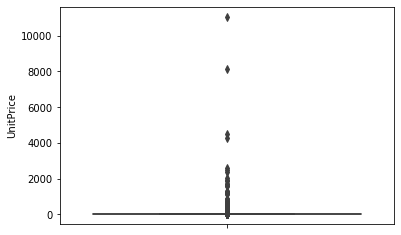

In [ ]:
sns.boxplot(y=data.UnitPrice)

As you can see, the box which is majority of the data can't be seen, so removing the extreme outliers can be our option. In real life case, I think the best choice is to verify to the data collection, are they really customer purchase or not. But since we can't do that now, let's assume that these isn't customer purchase (since the stockcode itself is suspicious). Let's remove them.

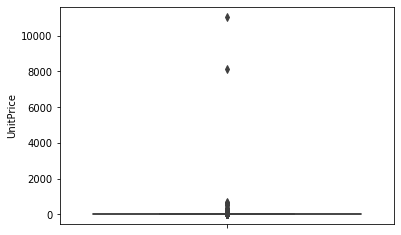

In [ ]:
data = data[(data.StockCode != 'DOT') & (data.StockCode != 'M') & (data.StockCode != 'AMAZONFEE')].copy()
sns.boxplot(y=data.UnitPrice)

this boxplot indicates that there's still something suspicious going on, so we will check again

In [ ]:
data[data.UnitPrice>200].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
9155,540647,22655,VINTAGE RED KITCHEN CABINET,1.0,2020-01-10 14:57:00,295.0,17406
40287,543253,22655,VINTAGE RED KITCHEN CABINET,1.0,2020-02-04 15:32:00,295.0,14842
76288,546480,22656,VINTAGE BLUE KITCHEN CABINET,1.0,2020-03-14 11:38:00,295.0,13452
91513,547814,22656,VINTAGE BLUE KITCHEN CABINET,1.0,2020-03-25 14:19:00,295.0,13452
100507,548661,POST,POSTAGE,1.0,2020-04-01 14:28:00,350.0,12415


ok the item with stockcode POST and B are suspicious to. For the same reason as before, we will remove them too.

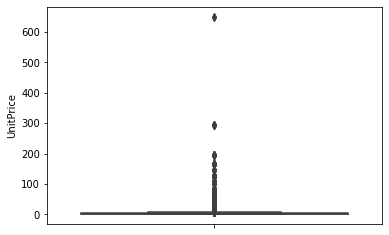

In [ ]:
data = data[(data.StockCode != 'B') & (data.StockCode != 'POST')].copy()
sns.boxplot(y=data.UnitPrice)

In [ ]:
data[data.UnitPrice>200].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
9155,540647,22655,VINTAGE RED KITCHEN CABINET,1.0,2020-01-10 14:57:00,295.0,17406
40287,543253,22655,VINTAGE RED KITCHEN CABINET,1.0,2020-02-04 15:32:00,295.0,14842
76288,546480,22656,VINTAGE BLUE KITCHEN CABINET,1.0,2020-03-14 11:38:00,295.0,13452
91513,547814,22656,VINTAGE BLUE KITCHEN CABINET,1.0,2020-03-25 14:19:00,295.0,13452
128697,551393,22656,VINTAGE BLUE KITCHEN CABINET,1.0,2020-04-28 12:22:00,295.0,14973


ok this looks fine

In [ ]:
data.describe()

,Quantity,UnitPrice
count,286025.000000,286025.000000
mean,11.043094,3.323256
std,144.204462,4.878182
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,74215.000000,649.500000


ok there's stil something quite off, the max quantity, let's check it.

In [ ]:
data[data.Quantity>500].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1736,540160,22379,RECYCLING BAG RETROSPOT,600.0,2020-01-05 11:50:00,1.85,15769
2425,540245,17003,BROCADE RING PURSE,720.0,2020-01-05 15:42:00,0.16,13082
3011,540264,22197,SMALL POPCORN HOLDER,600.0,2020-01-06 10:20:00,0.72,17949
3055,540267,22492,MINI PAINT SET VINTAGE,576.0,2020-01-06 11:12:00,0.55,12415
4328,540363,40016,CHINESE DRAGON PAPER LANTERNS,600.0,2020-01-06 15:54:00,0.25,12971


ok after checking, it looks fine.

next thing i want to do, is looking from some potential odd description by using the descrption length

In [ ]:
data['des_len'] = data.Description.apply(lambda x: len(x))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,des_len
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313,23
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,18
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,19
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313,24
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313,25


In [ ]:
data.des_len.describe()

count    286025.000000
mean         26.527307
std           5.340571
min           7.000000
25%          23.000000
50%          27.000000
75%          31.000000
max          35.000000
Name: des_len, dtype: float64

In [ ]:
data[data.des_len < 10].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,des_len
601,540026,21026,SPACE OWL,2.0,2020-01-04 13:25:00,0.85,NaN,9
1632,540154,21026,SPACE OWL,7.0,2020-01-05 11:30:00,0.85,NaN,9
2625,540248,21888,BINGO SET,2.0,2020-01-05 15:57:00,3.75,15034,9
3781,540352,21026,SPACE OWL,1.0,2020-01-06 14:27:00,0.85,NaN,9
4518,540372,62018,SOMBRERO,6.0,2020-01-06 16:41:00,1.95,13081,9


everything looks normal

next, let's see from the invoice number

In [ ]:
data['noinvo_len'] = data.InvoiceNo.apply(lambda x: len(x))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,des_len,noinvo_len
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313,23,6
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,18,6
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,19,6
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313,24,6
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313,25,6


In [ ]:
data.noinvo_len.describe()

count    286025.0
mean          6.0
std           0.0
min           6.0
25%           6.0
50%           6.0
75%           6.0
max           6.0
Name: noinvo_len, dtype: float64

oke everything looks fine

In [ ]:
data = data.drop(columns = ['des_len', 'noinvo_len'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313


Before moving forward, i want to replace null value in customer id to guest, just in case.

In [ ]:
value = {'CustomerID':'Guest'}
data = data.fillna(value = value)
data[data.CustomerID == 'Guest'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
404,540026,22215,CAKE STAND WHITE TWO TIER LACE,1.0,2020-01-04 13:25:00,16.98,Guest
405,540026,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1.0,2020-01-04 13:25:00,3.36,Guest
406,540026,85203,HANGING WOOD AND FELT BUTTERFLY,3.0,2020-01-04 13:25:00,0.43,Guest
407,540026,22216,T-LIGHT HOLDER WHITE LACE,5.0,2020-01-04 13:25:00,0.81,Guest
408,540026,22219,LOVEBIRD HANGING DECORATION WHITE,1.0,2020-01-04 13:25:00,1.66,Guest


# **Data Mining**

Enriching Data:

Adding 'TotalPrice' column

In [ ]:
data['TotalPrice'] = data.Quantity * data.UnitPrice
data.shape

(286025, 8)

# Customer Segmentation

I want to know who is our customer really is, based on their purchase behavior. Let's group them so how much our customer for each time purchase.

In [ ]:
data2 = data.groupby(['InvoiceNo','InvoiceDate','CustomerID']).sum()
data2 = data2.drop(columns = 'UnitPrice')
data2.head()

,,,Quantity,TotalPrice
InvoiceNo,InvoiceDate,CustomerID,,
539993,2020-01-04 10:00:00,13313,171.0,307.30
540001,2020-01-04 10:22:00,18097,270.0,474.66
540002,2020-01-04 10:23:00,16656,188.0,310.28
540003,2020-01-04 10:37:00,16875,140.0,368.80
540004,2020-01-04 10:37:00,13094,72.0,76.32


As stated in the study case, we have a limited budget. So before rolling out promo, let's narrow our scope to focus more only to our majority of customer.

In [ ]:
data2.describe()

,Quantity,TotalPrice
count,10218.000000,10218.000000
mean,154.518693,305.097392
std,117.798556,250.815405
min,1.000000,0.550000
25%,60.000000,135.907500
50%,127.000000,262.675000
75%,228.000000,393.337500
max,469.000000,2295.740000


Based on the data, for now we know that our customer are mainly a reseller.

As stated in the study case, we have a limited budget. Thus, before rolling out promo, let's narrow our scope to focus more only to our majority of customer. So let's see the outliers and remove them.

In [ ]:
from scipy.stats import skew

In [ ]:
skew(data2.TotalPrice)

2.131801280355203

Data is highly skewed, let's remove the outlier with this formula: mean-stddev <= data <= mean+stddev

In [ ]:
data2 = data2.query('TotalPrice >= 0 and TotalPrice <= 518.593623 + 1799.695926')
#we use 0 because the mean-stddev is minus, so instead we just use zero

In [ ]:
data2.describe()

,Quantity,TotalPrice
count,10218.000000,10218.000000
mean,154.518693,305.097392
std,117.798556,250.815405
min,1.000000,0.550000
25%,60.000000,135.907500
50%,127.000000,262.675000
75%,228.000000,393.337500
max,469.000000,2295.740000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


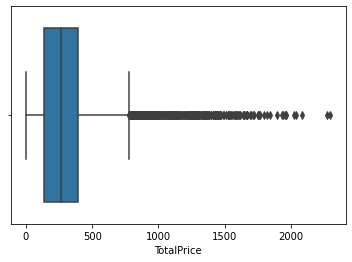

In [ ]:
sns.boxplot(data2.TotalPrice)

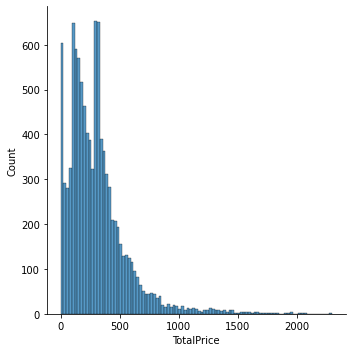

In [ ]:
sns.displot(data2.TotalPrice)

In [ ]:
skew(data2.Quantity)

0.7559864581938924

let's also remove the outlier in quantity

In [ ]:
data2 = data2.query('Quantity >= 0  and Quantity <= 220.835074 + 248.776217')
data2.describe()

,Quantity,TotalPrice
count,10218.000000,10218.000000
mean,154.518693,305.097392
std,117.798556,250.815405
min,1.000000,0.550000
25%,60.000000,135.907500
50%,127.000000,262.675000
75%,228.000000,393.337500
max,469.000000,2295.740000


In [ ]:
print(skew(data2.TotalPrice))
print(skew(data2.Quantity))

2.131801280355203
0.7559864581938924


ok since it looks pretty much all right, now we have a smaller scope and we will focus on this kind of customer 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


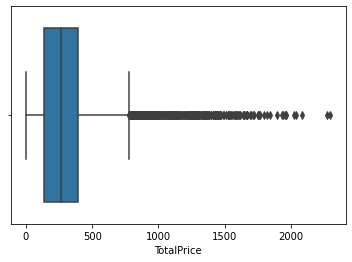

In [ ]:
sns.boxplot(data2.TotalPrice)

Ok now let's filter our main table, only with the data that we already sort before.

In [ ]:
data2 = data2.reset_index()
invoice = data2['InvoiceNo'].tolist()

In [ ]:
data = data[data.InvoiceNo.isin(invoice)]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313,12.5


In [ ]:
data.describe()

,Quantity,UnitPrice,TotalPrice
count,209978.000000,209978.000000,209978.000000
mean,7.527241,3.393027,14.865205
std,13.718957,4.951230,27.352766
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,4.130000
50%,3.000000,2.100000,9.950000
75%,10.000000,4.130000,17.000000
max,462.000000,649.500000,1700.000000


# Timeseries Trend

plot the total user each month

In [ ]:
#first we make a new column named month
data['Month'] = data.InvoiceDate.dt.to_period('M')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2020-01-04 10:00:00,1.95,13313,19.5,2020-01
1,539993,21499,BLUE POLKADOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,10.5,2020-01
2,539993,21498,RED RETROSPOT WRAP,25.0,2020-01-04 10:00:00,0.42,13313,10.5,2020-01
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2020-01-04 10:00:00,2.10,13313,10.5,2020-01
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2020-01-04 10:00:00,1.25,13313,12.5,2020-01


In [ ]:
#f, ax = plt.subplots(figsize=(20, 6))

since we want to see the customer/user, let's drop 'Guest' User

In [ ]:
data = data[data.CustomerID != 'Guest']

In [ ]:
user_month = data.groupby('Month').CustomerID.nunique().reset_index()
user_month.columns = ['month','total_user']
user_month.head()

,month,total_user
0,2020-01,670
1,2020-02,690
2,2020-03,893
3,2020-04,801
4,2020-05,980


Text(0.5, 1.0, 'Unique User by Month')

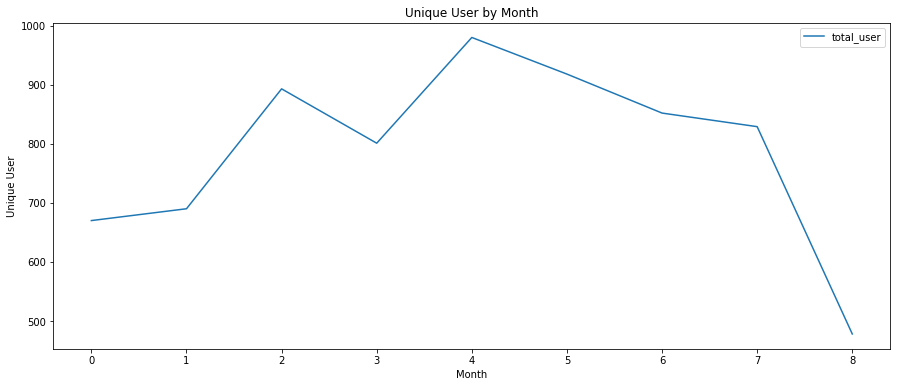

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data = user_month)
plt.xlabel('Month')
plt.ylabel('Unique User')
plt.title('Unique User by Month')

from the graph, we know that overall, we have a good unique user each month. Keep in mind that in december, we only collect data upto December 9th.

# Insights so far

* We know that majority of our customer were a reseller
* We have a good amount of unique user each month, with the trend of upward through the end of the year

# Action

From the information that we have, in order to reach our goals, we want to roll out promotion. But before that happen, we have to know to whom will we target the promotion. To answer it, first we do clustering to know our customer even more.

# Customer Classification

In [ ]:
data_cust = data[['CustomerID','InvoiceDate','Quantity','UnitPrice','TotalPrice','StockCode']]
data_cust.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice,TotalPrice,StockCode
0,13313,2020-01-04 10:00:00,10.0,1.95,19.5,22386
1,13313,2020-01-04 10:00:00,25.0,0.42,10.5,21499
2,13313,2020-01-04 10:00:00,25.0,0.42,10.5,21498
3,13313,2020-01-04 10:00:00,5.0,2.10,10.5,22379
4,13313,2020-01-04 10:00:00,10.0,1.25,12.5,20718


For clustering, let's group them based on their purchase behavior

In [ ]:
#total unique item bought per cust
total_bought = data_cust.groupby('CustomerID').StockCode.nunique().reset_index()
total_bought.columns = ['cust_id','total_product']
total_bought.head()

,cust_id,total_product
0,12347,52
1,12348,4
2,12350,16
3,12352,24
4,12353,4


In [ ]:
#total transaction value
total_trx = data_cust.groupby('CustomerID').TotalPrice.sum().reset_index()
total_trx.columns = ['cust_id','total_trx']
total_trx.head()

,cust_id,total_trx
0,12347,1442.82
1,12348,327.00
2,12350,294.40
3,12352,641.51
4,12353,89.00


In [ ]:
data.InvoiceDate.max()

Timestamp('2020-09-13 12:37:00')

In [ ]:
#Day since last transactions happen
data['LastTrx'] = (pd.to_datetime('2020-12-09 12:50:00') - data.InvoiceDate).dt.days
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month,LastTrx
296377,566567,21930,JUMBO STORAGE BAG SKULLS,10.0,2020-09-13 12:37:00,2.08,16161,20.8,2020-09,87
296378,566567,23203,JUMBO BAG VINTAGE DOILY,10.0,2020-09-13 12:37:00,2.08,16161,20.8,2020-09,87
296379,566567,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,12.0,2020-09-13 12:37:00,0.85,16161,10.2,2020-09,87
296380,566567,23344,JUMBO BAG 50'S CHRISTMAS,20.0,2020-09-13 12:37:00,2.08,16161,41.6,2020-09,87
296381,566567,23343,JUMBO BAG VINTAGE CHRISTMAS,20.0,2020-09-13 12:37:00,2.08,16161,41.6,2020-09,87


In [ ]:
cus_recent_trx = data.groupby('CustomerID').LastTrx.min().reset_index()
cus_recent_trx.columns = ['cust_id','recent_trx']
cus_recent_trx.head()

,cust_id,recent_trx
0,12347,129
1,12348,248
2,12350,310
3,12352,261
4,12353,203


In [ ]:
#buying frequency in a year
cus_frequency = data_cust.groupby('CustomerID').InvoiceDate.nunique().reset_index()
cus_frequency.columns = ['cust_id','freq']
cus_frequency.head()

,cust_id,freq
0,12347,3
1,12348,1
2,12350,1
3,12352,4
4,12353,1


In [ ]:
#merge the 4 table
cust = pd.DataFrame()
cust['cust_id'] = cus_recent_trx.cust_id
cust = cust.merge(total_bought, on='cust_id')
cust = cust.merge(total_trx, on='cust_id')
cust = cust.merge(cus_recent_trx, on='cust_id')
cust = cust.merge(cus_frequency, on='cust_id')
cust.head()

,cust_id,total_product,total_trx,recent_trx,freq
0,12347,52,1442.82,129,3
1,12348,4,327.00,248,1
2,12350,16,294.40,310,1
3,12352,24,641.51,261,4
4,12353,4,89.00,203,1


# K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cust)
    ssd.append(km.inertia_)

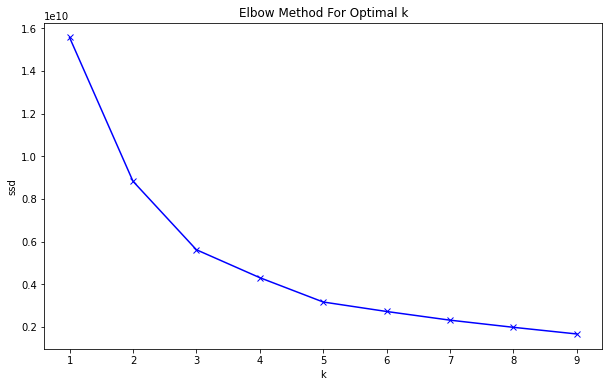

In [ ]:
# Plot sum of squared distances / elbow method
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

In this case, we select K = 4

In [ ]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(cust)

In [ ]:
pred = model.labels_
cust['Cluster'] = pred
cust.head()

,cust_id,total_product,total_trx,recent_trx,freq,Cluster
0,12347,52,1442.82,129,3,2
1,12348,4,327.00,248,1,2
2,12350,16,294.40,310,1,2
3,12352,24,641.51,261,4,2
4,12353,4,89.00,203,1,2


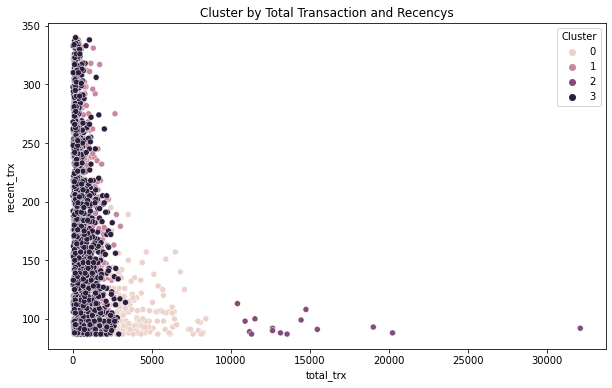

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=cust, x="total_trx", y="recent_trx", hue="Cluster")
plt.title('Cluster by Total Transaction and Recencys')
plt.show()

To sum up our cluster, let's make another table to see what majority of the cluster looks like.

In [ ]:
customers = cust.groupby('Cluster').mean().reset_index()
customers.sort_values('total_trx')

,Cluster,total_product,total_trx,recent_trx,freq
1,1,37.678623,626.199420,177.045194,2.483501
2,2,34.150930,651.668470,178.666437,2.308753
3,3,112.158470,3948.704536,107.251366,11.338798
0,0,250.466667,14886.350667,94.333333,33.600000


In [ ]:
contribution = cust.groupby('Cluster').total_trx.sum().reset_index()
contribution['Contribution (%)'] = (contribution.total_trx/contribution.total_trx.sum())*100
contribution

,Cluster,total_trx,Contribution (%)
0,0,223295.260,8.077527
1,1,872921.991,31.577255
2,2,945570.950,34.205273
3,3,722612.930,26.139945


From "Customers" & "Contribution" Table, now we can classify our customer based on which cluster they belong. Let's determine what kind of customers is in each cluster.

Cluster 0: Low unique product, low spending, not recent trx, low freq, high contribution --> **Seasonal Customer**

Cluster 1: Low unique product, low spending, not recent trx, low freq, high contribution --> **Seasonal Customer**

Cluster 2: medium unique product, medium spending, recent trx, medium freq, high contribution --> **Loyal Customer**

Cluster 3: high unique product, very high spending, recent trx, high freq, low contribution --> **Dropshipper**


Let's see what our customer distribution looks like

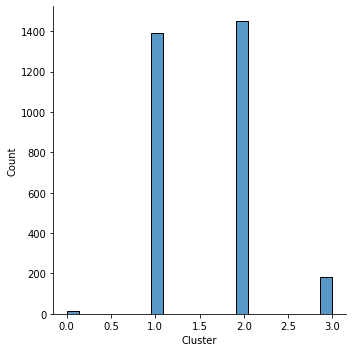

In [ ]:
sns.displot(data=cust,x='Cluster')

From the graph we know that most our customer is from cluster 0 and 1

# Conclusion

From our the insight that we got, we know that:
1. Most of our customer are reseller
2. From further classification, we know that our best customers are seasonal customer, and our loyal customer are medium spender reseller
3. Based on this fact, we want to focus our budget to strengthen our business by targeting those kind of customers.


# Proposed Action

**Proposed Idea 1:**

**Idea:** Make a VIP based membership

**Goals:** To reward the customer in cluster 2 with more benefit (discount, free shipping, etc.) so we can keep them, and also become selling point to the customer that outside that cluster

**Proposed Idea 2:**
 
**Idea:** Rollout seasonal promotion like seasonal discount, bundle offers, etc.

**Goals:** To attract more new customer and to keep the loyal one to keep using our service.

**Proposed Idea 3:**

**Idea:** Make a seasonal personalization like seasonal/holiday item category, push notification on trending items, etc.

**Goals:** To help our customer navigate through our website, so the chance of converting is much higher.